In [1]:
import matplotlib.pyplot as plt
from src.tf_schedulers import *
from src.seq2seq import Encoder, Decoder, Seq2Seq
import numpy as np
from functools import partial

In [38]:
MAX_ITERATIONS = 500
INTIAL_TEACHER_FORCING = 1.0



enc = Encoder(128, 128)
dec = Decoder(128, 128)
seq2seq = Seq2Seq(enc, dec, teacher_forcing=INTIAL_TEACHER_FORCING)

In [39]:
colors = { 0:"#003f5c", 1:"#444e86", 2:"#955196", 3:"#dd5182", 4:"#ff6e54", 5:"#ffa600"}

In [40]:
functions = {
    'constant':constant_annealing, 
    'linear': linear_annealing,
    'log':logarithmic_annealing, 
    'exp-0.99': partial(exponentional_annealing, gamma=0.99),
    'fast':fast_annealing,
    'sigmoid': sigmoid_annealing,
    'cos':cosine_annealing,
    'softplus': softplus_annealing, 
    'elu': elu_annealing, 
    'log_sigmoid': log_sigmoid_annealing, 
    'tanhshrink': tanhshrink_annealing
}
tf_rates = [[] for _ in functions]

In [41]:
iterations = np.linspace(1, MAX_ITERATIONS, MAX_ITERATIONS) - 1.

In [42]:
for i, (name, function) in enumerate(functions.items()):
    seq2seq.teacher_forcing = INTIAL_TEACHER_FORCING
    for n_iter in iterations:
        function(seq2seq, n_iter, MAX_ITERATIONS, INTIAL_TEACHER_FORCING)
        tf_rates[i].append(seq2seq.teacher_forcing)

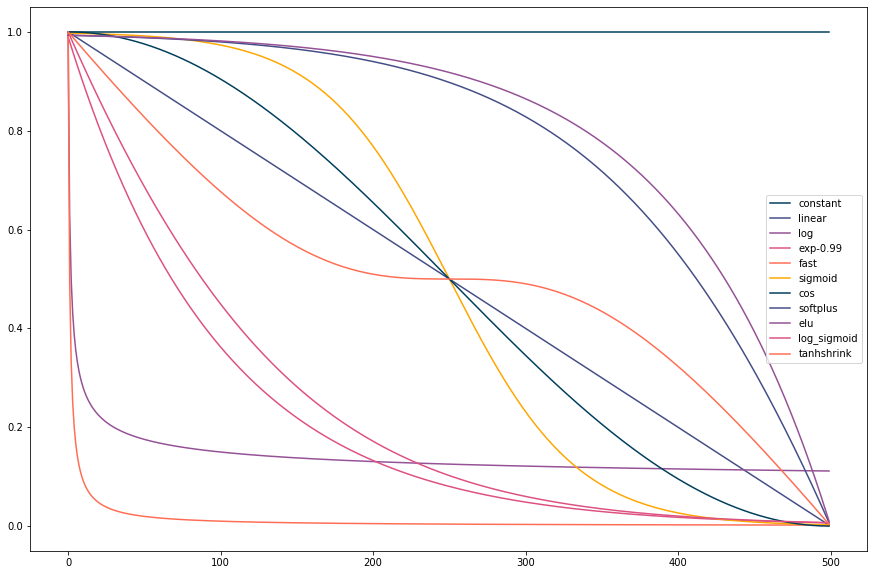

In [43]:
plt.figure(figsize=(15, 10))

for i, (name, rates) in enumerate(zip(functions, tf_rates)):
    plt.plot(iterations, rates, label=name, color=colors[i % 6])
    
plt.legend()
plt.show()